In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
from os import listdir
from numpy import asarray
from numpy import save
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (
    BatchNormalization, Activation, Flatten, Dense, Dropout
)

# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [11]:
def displayImages(foldername,dogorcat,startID):
    # plot first few images
    for i in range(9):
        #define subplot 3x3
        plt.subplot(330 + 1 + i)
        # define filename
        filename = foldername + dogorcat +'.' + str(i+startID) + '.jpg'
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        plt.imshow(image)
        # show the figure
plt.show()

In [14]:
import zipfile

In [15]:
with zipfile.ZipFile('dogvscat1000.zip', 'r') as zip_ref:
    zip_ref.extractall()

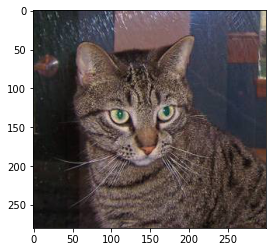

In [16]:

folder='dogvscat1000/'
# show one image
filename = folder + 'cat.' + '1' + '.jpg'
# load image pixels
image = imread(filename)
# plot raw pixel data
plt.imshow(image)

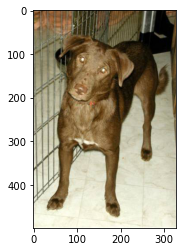

In [17]:
folder='dogvscat1000/'
# show one image
filename = folder + 'dog.' + '1' + '.jpg'
# load image pixels
image = imread(filename)
# plot raw pixel data
plt.imshow(image)

In [18]:
def displayImages(foldername,dogorcat,startID):
    # plot first few images
    for i in range(9):
        #define subplot 3x3
        plt.subplot(330 + 1 + i)
        # define filename
        filename = foldername + dogorcat +'.' + str(i+startID) + '.jpg'
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        plt.imshow(image)
        # show the figure
plt.show()

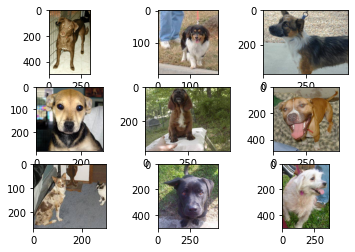

In [19]:
displayImages(folder,"dog",1)

In [21]:
# define location of dataset
folder = 'dogvscat1000/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
        # load image
    photo = load_img(folder + file, target_size=(32, 32),color_mode="rgb")  #"rgb" for color mode; "grayscale"
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(1000, 32, 32, 3) (1000,)


In [22]:
print(photos[1].shape)

(32, 32, 3)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=.4, random_state=42)

In [24]:
model = keras.Sequential([
    keras.layers.LayerNormalization(axis=3 , center=True , scale=True),
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(512, activation='relu',name="Hidden"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, name="Output"),
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
history=model.fit(X_train, y_train, epochs=100,verbose=1,batch_size=100)

Epoch 1/100
6/6 [==============================] - 1s 54ms/step - loss: 3.9695e-04 - accuracy: 1.0000
Epoch 2/100
6/6 [==============================] - 0s 54ms/step - loss: 5.7558e-04 - accuracy: 1.0000
Epoch 3/100
6/6 [==============================] - 0s 48ms/step - loss: 6.9050e-04 - accuracy: 1.0000
Epoch 4/100
6/6 [==============================] - 0s 52ms/step - loss: 3.5426e-04 - accuracy: 1.0000
Epoch 5/100
6/6 [==============================] - 0s 52ms/step - loss: 7.6024e-04 - accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 50ms/step - loss: 4.2619e-04 - accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 48ms/step - loss: 6.3457e-04 - accuracy: 1.0000
Epoch 8/100
6/6 [==============================] - 0s 49ms/step - loss: 8.1814e-04 - accuracy: 1.0000
Epoch 9/100
6/6 [==============================] - 0s 52ms/step - loss: 3.4679e-04 - accuracy: 1.0000
Epoch 10/100
6/6 [==============================] - 0s 50ms/step - loss: 3.4768e-0

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_3 (Laye  (None, 32, 32, 3)        6         
 rNormalization)                                                 
                                                                 
 Input (Flatten)             (None, 3072)              0         
                                                                 
 Hidden (Dense)              (None, 512)               1573376   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 Output (Dense)              (None, 2)                

In [61]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n test accuracy:', test_acc)

13/13 - 0s - loss: 2.2363 - accuracy: 0.6225 - 219ms/epoch - 17ms/step

 test accuracy: 0.6225000023841858


In [64]:
# dropout is considered as 0.2 and batch_size as 100
model = keras.Sequential([
    keras.layers.LayerNormalization(axis=3 , center=True , scale=True),
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(512, activation='relu',name="Hidden"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, name="Output"),
])

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
history=model.fit(X_train, y_train, epochs=10,verbose=1,batch_size=100)

Epoch 1/10
6/6 [==============================] - 3s 53ms/step - loss: 1.6743 - accuracy: 0.5050
Epoch 2/10
6/6 [==============================] - 0s 53ms/step - loss: 0.6359 - accuracy: 0.7483
Epoch 3/10
6/6 [==============================] - 0s 56ms/step - loss: 0.5016 - accuracy: 0.7750
Epoch 4/10
6/6 [==============================] - 0s 57ms/step - loss: 0.3916 - accuracy: 0.8150
Epoch 5/10
6/6 [==============================] - 0s 53ms/step - loss: 0.3279 - accuracy: 0.8767
Epoch 6/10
6/6 [==============================] - 0s 59ms/step - loss: 0.2729 - accuracy: 0.8833
Epoch 7/10
6/6 [==============================] - 0s 54ms/step - loss: 0.2584 - accuracy: 0.9083
Epoch 8/10
6/6 [==============================] - 0s 57ms/step - loss: 0.2174 - accuracy: 0.9167
Epoch 9/10
6/6 [==============================] - 0s 75ms/step - loss: 0.1895 - accuracy: 0.9383
Epoch 10/10
6/6 [==============================] - 0s 58ms/step - loss: 0.1569 - accuracy: 0.9417


In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_5 (Laye  (100, 32, 32, 3)         6         
 rNormalization)                                                 
                                                                 
 Input (Flatten)             (100, 3072)               0         
                                                                 
 Hidden (Dense)              (100, 512)                1573376   
                                                                 
 dropout_5 (Dropout)         (100, 512)                0         
                                                                 
 batch_normalization_5 (Batc  (100, 512)               2048      
 hNormalization)                                                 
                                                                 
 Output (Dense)              (100, 2)                 

In [69]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n test accuracy:', test_acc)

13/13 - 2s - loss: 0.9805 - accuracy: 0.6150 - 2s/epoch - 116ms/step

 test accuracy: 0.6150000095367432


In [70]:
# dropout is considered as 0.2 and batch_size as 0
model = keras.Sequential([
    keras.layers.LayerNormalization(axis=3 , center=True , scale=True),
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(512, activation='relu',name="Hidden"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, name="Output"),
])

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
history=model.fit(X_train, y_train, epochs=10,verbose=1,batch_size=0)

Epoch 1/10
19/19 [==============================] - 3s 28ms/step - loss: 1.2837 - accuracy: 0.5433
Epoch 2/10
19/19 [==============================] - 1s 28ms/step - loss: 0.6017 - accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 1s 29ms/step - loss: 0.4060 - accuracy: 0.8133
Epoch 4/10
19/19 [==============================] - 1s 29ms/step - loss: 0.3736 - accuracy: 0.8300
Epoch 5/10
19/19 [==============================] - 1s 28ms/step - loss: 0.2906 - accuracy: 0.8833
Epoch 6/10
19/19 [==============================] - 1s 28ms/step - loss: 0.2935 - accuracy: 0.8783
Epoch 7/10
19/19 [==============================] - 1s 28ms/step - loss: 0.2271 - accuracy: 0.8950
Epoch 8/10
19/19 [==============================] - 1s 30ms/step - loss: 0.1759 - accuracy: 0.9367
Epoch 9/10
19/19 [==============================] - 1s 27ms/step - loss: 0.1612 - accuracy: 0.9383
Epoch 10/10
19/19 [==============================] - 1s 29ms/step - loss: 0.1578 - accuracy: 0.9333


In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_6 (Laye  (None, 32, 32, 3)        6         
 rNormalization)                                                 
                                                                 
 Input (Flatten)             (None, 3072)              0         
                                                                 
 Hidden (Dense)              (None, 512)               1573376   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 Output (Dense)              (None, 2)                

In [74]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n test accuracy:', test_acc)

13/13 - 1s - loss: 0.9459 - accuracy: 0.6525 - 804ms/epoch - 62ms/step

 test accuracy: 0.6524999737739563


In [76]:
# dropout is considered as 0.8 and batch_size as 0
model = keras.Sequential([
    keras.layers.LayerNormalization(axis=3 , center=True , scale=True),
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(512, activation='relu',name="Hidden"),
    keras.layers.Dropout(rate=0.8),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, name="Output"),
])

In [77]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [78]:
history=model.fit(X_train, y_train, epochs=10,verbose=1,batch_size=0)

Epoch 1/10
19/19 [==============================] - 3s 28ms/step - loss: 0.9998 - accuracy: 0.5200
Epoch 2/10
19/19 [==============================] - 1s 29ms/step - loss: 0.9086 - accuracy: 0.5783
Epoch 3/10
19/19 [==============================] - 1s 28ms/step - loss: 0.8072 - accuracy: 0.6083
Epoch 4/10
19/19 [==============================] - 1s 28ms/step - loss: 0.7404 - accuracy: 0.6167
Epoch 5/10
19/19 [==============================] - 1s 28ms/step - loss: 0.7429 - accuracy: 0.6183
Epoch 6/10
19/19 [==============================] - 1s 30ms/step - loss: 0.7111 - accuracy: 0.6217
Epoch 7/10
19/19 [==============================] - 1s 29ms/step - loss: 0.6779 - accuracy: 0.6833
Epoch 8/10
19/19 [==============================] - 1s 28ms/step - loss: 0.6335 - accuracy: 0.6633
Epoch 9/10
19/19 [==============================] - 1s 30ms/step - loss: 0.6351 - accuracy: 0.6833
Epoch 10/10
19/19 [==============================] - 1s 27ms/step - loss: 0.6503 - accuracy: 0.6550


In [79]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_8 (Laye  (None, 32, 32, 3)        6         
 rNormalization)                                                 
                                                                 
 Input (Flatten)             (None, 3072)              0         
                                                                 
 Hidden (Dense)              (None, 512)               1573376   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 Output (Dense)              (None, 2)                

In [80]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n test accuracy:', test_acc)

13/13 - 1s - loss: 0.6996 - accuracy: 0.6300 - 849ms/epoch - 65ms/step

 test accuracy: 0.6299999952316284


In [81]:
# dropout is considered as 0.8 and batch_size as 100
model = keras.Sequential([
    keras.layers.LayerNormalization(axis=3 , center=True , scale=True),
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(512, activation='relu',name="Hidden"),
    keras.layers.Dropout(rate=0.8),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, name="Output"),
])

In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [83]:
history=model.fit(X_train, y_train, epochs=10,verbose=1,batch_size=100)

Epoch 1/10
6/6 [==============================] - 2s 57ms/step - loss: 1.0154 - accuracy: 0.5383
Epoch 2/10
6/6 [==============================] - 0s 57ms/step - loss: 0.9135 - accuracy: 0.5850
Epoch 3/10
6/6 [==============================] - 0s 62ms/step - loss: 0.7712 - accuracy: 0.6267
Epoch 4/10
6/6 [==============================] - 0s 52ms/step - loss: 0.6831 - accuracy: 0.6633
Epoch 5/10
6/6 [==============================] - 0s 55ms/step - loss: 0.6399 - accuracy: 0.6883
Epoch 6/10
6/6 [==============================] - 0s 51ms/step - loss: 0.7084 - accuracy: 0.6550
Epoch 7/10
6/6 [==============================] - 0s 51ms/step - loss: 0.6658 - accuracy: 0.6717
Epoch 8/10
6/6 [==============================] - 0s 53ms/step - loss: 0.5917 - accuracy: 0.7183
Epoch 9/10
6/6 [==============================] - 0s 56ms/step - loss: 0.6052 - accuracy: 0.7050
Epoch 10/10
6/6 [==============================] - 0s 66ms/step - loss: 0.5565 - accuracy: 0.7450


In [84]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_9 (Laye  (100, 32, 32, 3)         6         
 rNormalization)                                                 
                                                                 
 Input (Flatten)             (100, 3072)               0         
                                                                 
 Hidden (Dense)              (100, 512)                1573376   
                                                                 
 dropout_9 (Dropout)         (100, 512)                0         
                                                                 
 batch_normalization_9 (Batc  (100, 512)               2048      
 hNormalization)                                                 
                                                                 
 Output (Dense)              (100, 2)                 

In [85]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n test accuracy:', test_acc)

13/13 - 1s - loss: 0.7561 - accuracy: 0.6175 - 1s/epoch - 79ms/step

 test accuracy: 0.6175000071525574
